In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# Ping the website and grab all the data available on the link
link ='https://www.coursera.org/collections/popular-free-courses'
get_website = requests.get(link, timeout=1000)
content = BeautifulSoup(get_website.content)
print(content.prettify())

<!DOCTYPE html>
<html dir="ltr" itemtype="http://schema.org" lang="en" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <link crossorigin="" href="https://d3njjcbhbojbot.cloudfront.net" rel="preconnect"/>
  <meta content="IE=Edge,chrome=IE7" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="Coursera" property="og:site_name"/>
  <meta content="727836538,4807654" property="fb:admins"/>
  <meta content="823425307723964" property="fb:app_id"/>
  <meta content="Coursera" name="twitter:site"/>
  <meta content="Coursera" name="twitter:app:name:iphone"/>
  <meta content="Coursera" name="twitter:app:name:ipad"/>
  <meta content="Coursera" name="twitter:app:name:googleplay"/>
  <meta content="id736535961" name="twitter:app:id:iphone"/>
  <meta content="id736535961" name="twitter:app:id:ipad"/>
  <meta content="org.coursera.android" name="twitter:app:id:googleplay"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://d3njjcbhbojbot.clou

In [3]:
# Loop to go through each row of free courses and store data in lists
course_names = []
course_rating = []
course_provider = []
num_reviews = []

In [4]:
for i in content.find_all('div',
class_='horizontal-box'):
    
    course = i.find_all('h4',
class_='headline-3-text item-name font-weight-bold') 
                        
    rating = i.find_all('span',
class_='ratings-text')
                        
    provider = i.find_all('span') 

    reviews = i.find_all('span', class_='ratings-count')
                        
    if course != []:
        course_names.append(course[0].text.split('\n')[0])
            
        course_rating.append(rating[0].text.split('\n')[0])

        course_provider.append(provider[0].text.split('\n')[0])

        num_reviews.append(reviews[0].text.split('\n')[0])

In [5]:
# Store data in a dataframe
course_df = pd.DataFrame()
course_df['Name'] = course_names
course_df['Rating'] = course_rating
course_df['Reviews'] = num_reviews
course_df['Course Provider'] = course_provider
course_df

,Name,Rating,Reviews,Course Provider
0,The Science of Well-Being,4.9,"(29,009)",Yale University
1,Learning How to Learn: Powerful mental tools t...,4.8,"(74,434)","McMaster University, University of California ..."
2,Financial Markets,4.8,"(18,294)",Yale University
3,Machine Learning,4.9,"(161,056)",Stanford University
4,COVID-19 Contact Tracing,4.9,"(83,669)",Johns Hopkins University
5,Successful Negotiation: Essential Strategies a...,4.8,"(14,413)",University of Michigan
6,English for Career Development,4.8,"(10,041)",University of Pennsylvania
7,Financial Engineering and Risk Management Part I,4.6,"(2,306)",Columbia University
8,"Algorithms, Part I",4.9,"(8,637)",Princeton University
9,Seeing Through Photographs,4.8,"(3,883)",The Museum of Modern Art


In [6]:
course_df.shape

(24, 4)

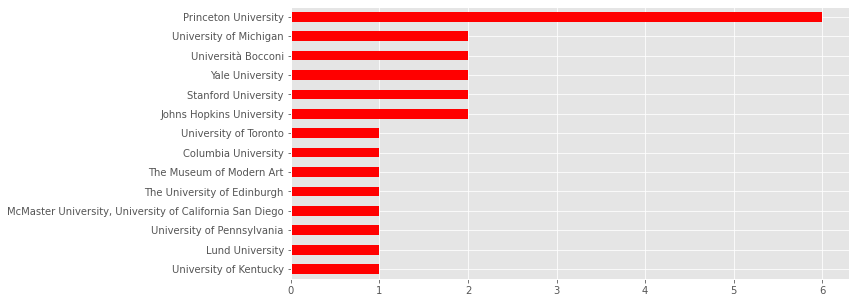

In [12]:
#Which University provided most number of popular free courses?
fig= plt.figure(figsize=(10,5))
course_df['Course Provider'].value_counts().sort_values(ascending=True).plot(kind=
'barh', color='red')
plt.show()

In [8]:
import seaborn as sns 

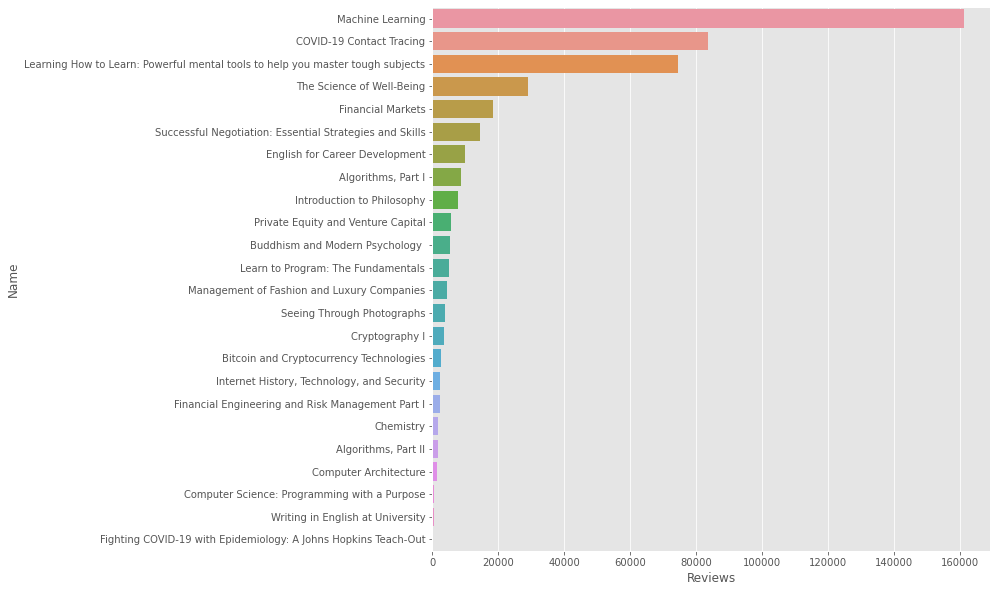

In [9]:
#Rank the courses by the number of reviews
plt.style.use('ggplot')
fig= plt.figure(figsize=(10,10))
course_df['Reviews'] = [(str(i).replace(",", "")) for i in
course_df['Reviews']]
course_df['Reviews'] = [(str(i).replace(")", "")) for i in
course_df['Reviews']]
course_df['Reviews'] = [(str(i).replace("(", "")) for i in
course_df['Reviews']]
course_df['Reviews'] = course_df['Reviews'].astype(int)
course_df.sort_values(by=['Reviews'], inplace=True, ascending =
False)
sns.barplot(x='Reviews' , y='Name', data=course_df)
plt.show()

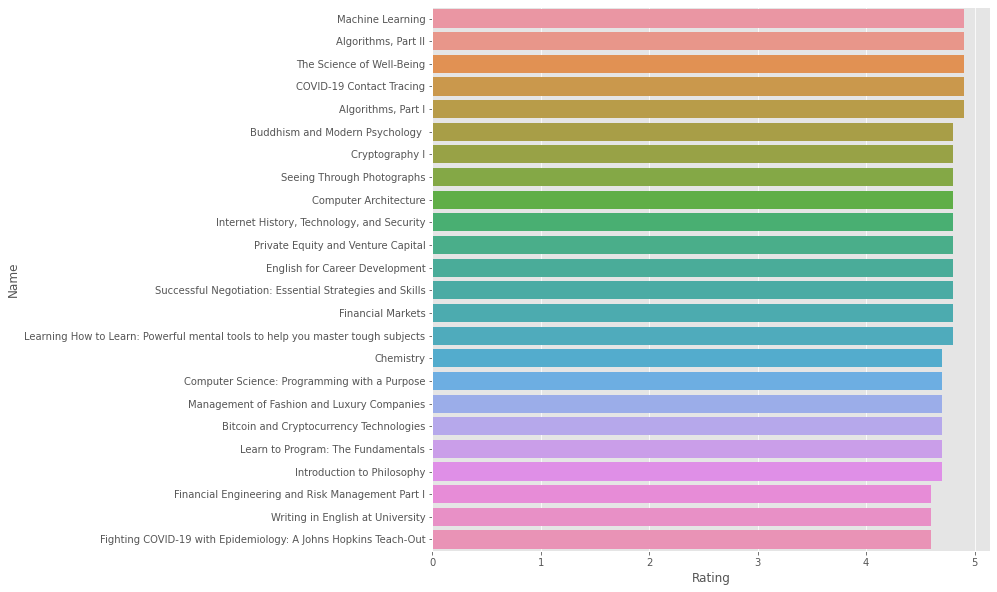

In [10]:
#Rank the courses by their rating
fig= plt.figure(figsize=(10,10))
course_df['Rating'] = course_df['Rating'].astype(float)
course_df.sort_values(by=['Rating'], inplace=True, ascending =
False)
sns.barplot(x='Rating' , y='Name', data=course_df)
plt.show()